In [24]:
!pip install tensorflow tensorflow_hub
!pip install transformers
!pip install torch
!pip install matplotlib
!pip install scikit-learn
!pip install nltk

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


# **Contextual Embeddings: ELMo and BERT**

*Based on Chapter 5 of "Speech and Language Processing" by Jurafsky & Martin*  

---
Word embeddings are fundamental to many Natural Language Processing (NLP) tasks, enabling machines to understand and process human language effectively. While **static embeddings** like Word2Vec and GloVe assign a fixed vector to each word, regardless of context, **contextual embeddings** generate dynamic representations based on the surrounding words in a sentence. This project delves into two prominent contextual embedding models:

- **ELMo** (Embeddings from Language Models)
- **BERT** (Bidirectional Encoder Representations from Transformers)

By the end of this project, you will understand how these models work, implement them using Python, and explore their applications using modern libraries.

---

## **Setting Up the Environment**

Before we begin, ensure you have the necessary libraries installed. We'll use `tensorflow_hub` for ELMo and `transformers` from Hugging Face for BERT, along with other essential libraries for data processing and visualization.

```python
# Install necessary libraries
!pip install tensorflow tensorflow_hub
!pip install transformers
!pip install torch
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
```


In [25]:
# Importing necessary libraries
import nltk
import tensorflow as tf
import tensorflow_hub as hub
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Understanding Contextual Embeddings**

**Contextual embeddings** dynamically generate word representations based on the context in which they appear. Unlike static embeddings, which assign a single vector to each word, contextual embeddings produce different vectors for a word depending on its surrounding words, capturing nuanced meanings and relationships.

**Key Advantages:**
- **Disambiguation:** Better handles polysemy (words with multiple meanings).
- **Context Awareness:** Captures syntactic and semantic nuances based on context.
- **Improved Performance:** Enhances performance in downstream NLP tasks like sentiment analysis, named entity recognition, and question answering.

---

## **ELMo (Embeddings from Language Models)**

### **What is ELMo?**

**ELMo** (Embeddings from Language Models) was introduced by Peters et al. in 2018. It generates contextualized word embeddings by leveraging deep bidirectional language models (biLMs). ELMo embeddings are functions of the internal states of a deep bidirectional language model, allowing them to capture complex characteristics of word use and meaning.

**Key Characteristics:**
- **Deep BiLMs:** Utilizes both forward and backward LSTMs to capture context from both directions.
- **Layer-wise Representations:** Combines representations from different layers to capture various levels of linguistic information.
- **Compatibility:** Can be integrated into existing models to enhance performance without extensive retraining.

### **Implementing ELMo in Python with TensorFlow Hub**

We'll use the `tensorflow_hub` library to work with pre-trained ELMo models. TensorFlow Hub provides a straightforward interface to access and use pre-trained models.

#### **Loading the Pre-trained ELMo Model**


In [26]:
# ~300MB
# Load the pre-trained ELMo model from TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")
print("ELMo model loaded successfully.")

ELMo model loaded successfully.


#### **Generating ELMo Embeddings**

Let's generate ELMo embeddings for sample sentences.

In [27]:
# Sample sentences
sentences = [
    "The cat sits on the mat.",
    "The bank can guarantee deposits will eventually cover future tuition costs.",
    "She went to the bank to deposit her paycheck."
]

# Tokenize sentences
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
print("Tokenized Sentences:")
print(tokenized_sentences)

Tokenized Sentences:
[['The', 'cat', 'sits', 'on', 'the', 'mat', '.'], ['The', 'bank', 'can', 'guarantee', 'deposits', 'will', 'eventually', 'cover', 'future', 'tuition', 'costs', '.'], ['She', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'her', 'paycheck', '.']]


In [28]:
# Function to generate ELMo embeddings
def get_elmo_embeddings(sentences):
    embeddings = []
    for sentence in sentences:
        # ELMo expects a list of sentences, where each sentence is a string
        elmo_output = elmo.signatures['default'](text=tf.constant([sentence]))
        embedding = elmo_output['elmo']
        # The output shape is (1, max_length, 1024)
        embedding_np = embedding.numpy()[0]  # Shape: (max_length, 1024)
        embeddings.append(embedding_np)
    return embeddings

# Generate ELMo embeddings
print("Generating ELMo embeddings...")
elmo_embeddings = get_elmo_embeddings(sentences)
print("ELMo embeddings generated successfully.")

Generating ELMo embeddings...
ELMo embeddings generated successfully.


#### **Exploring ELMo Embeddings**

Let's inspect the embeddings for a specific word in different contexts.

In [29]:
# Extract embeddings for the word "bank" in different contexts
bank_embeddings = []
for i, sentence in enumerate(tokenized_sentences):
    for j, word in enumerate(sentence):
        if word.lower() == 'bank':
            bank_embeddings.append(elmo_embeddings[i][j])

# Display the shape of the embeddings
for i, emb in enumerate(bank_embeddings):
    print(f"ELMo Embedding {i+1} shape: {emb.shape}")

ELMo Embedding 1 shape: (1024,)
ELMo Embedding 2 shape: (1024,)



**Explanation:**
- We extracted ELMo embeddings for the word "bank" in two different contexts.
- Each embedding has a dimensionality of 1024, capturing rich contextual information.

---

## **BERT (Bidirectional Encoder Representations from Transformers)**

### **What is BERT?**

**BERT** (Bidirectional Encoder Representations from Transformers) was introduced by Devlin et al. in 2018. It leverages Transformer architecture to generate deep bidirectional representations by jointly conditioning on both left and right contexts. BERT has achieved state-of-the-art results on various NLP tasks due to its ability to capture complex language patterns.

**Key Characteristics:**
- **Transformer Architecture:** Utilizes self-attention mechanisms for capturing long-range dependencies.
- **Masked Language Modeling:** Trains on predicting masked tokens, enabling bidirectional context.
- **Pre-trained Models:** Offers various pre-trained models that can be fine-tuned for specific tasks.

### **Implementing BERT in Python with Hugging Face Transformers**

We'll use the `transformers` library by Hugging Face to work with pre-trained BERT models.

#### **Loading the Pre-trained BERT Model and Tokenizer**

In [30]:
# Initialize BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()  # Set the model to evaluation mode
print("BERT model and tokenizer loaded successfully.")

BERT model and tokenizer loaded successfully.


#### **Generating BERT Embeddings**

Let's generate BERT embeddings for sample sentences.


In [31]:
# Function to generate BERT embeddings
def get_bert_embeddings(sentences):
    all_embeddings = []
    for sentence in sentences:
        # Tokenize input
        inputs = bert_tokenizer(sentence, return_tensors='pt')
        with torch.no_grad():
            outputs = bert_model(**inputs)
            # outputs.last_hidden_state is the last hidden state
            last_hidden_state = outputs.last_hidden_state  # Shape: (1, seq_len, 768)
            # Convert to numpy array
            embedding = last_hidden_state.squeeze(0).numpy()
            all_embeddings.append(embedding)
    return all_embeddings

# Generate BERT embeddings
bert_embeddings = get_bert_embeddings(sentences)
print("BERT embeddings generated.")

BERT embeddings generated.


#### **Exploring BERT Embeddings**

Let's inspect the embeddings for a specific word in different contexts.


In [32]:
# Function to align tokens between tokenized sentence and BERT tokens
def align_tokens(original_tokens, bert_tokens):
    aligned_indices = []
    bert_idx = 0
    for token in original_tokens:
        # BERT tokenizer may split tokens into subwords
        sub_tokens = bert_tokenizer.tokenize(token)
        aligned_indices.append(bert_idx)
        bert_idx += len(sub_tokens)
    return aligned_indices

# Extract embeddings for the word "bank" in different contexts
bert_bank_embeddings = []
for i, sentence in enumerate(sentences):
    original_tokens = nltk.word_tokenize(sentence)
    bert_tokens = bert_tokenizer.tokenize(sentence)
    aligned_indices = align_tokens(original_tokens, bert_tokens)
    # Find the index of "bank" (case-insensitive) in original tokens
    try:
        word_idx = original_tokens.index('bank')
    except ValueError:
        try:
            word_idx = original_tokens.index('Bank')  # In case of capitalization
        except ValueError:
            continue  # Skip if "bank" is not in the sentence
    # Get the corresponding BERT token index
    bert_word_idx = aligned_indices[word_idx]
    # Extract the embedding for the first subword of "bank"
    bert_bank_embeddings.append(bert_embeddings[i][bert_word_idx])

# Display the shape of the embeddings
for i, emb in enumerate(bert_bank_embeddings):
    print(f"BERT Embedding {i+1} shape: {emb.shape}")

BERT Embedding 1 shape: (768,)
BERT Embedding 2 shape: (768,)



**Explanation:**
- We extracted BERT embeddings for the word "bank" in two different contexts.
- Each embedding has a dimensionality of 768, capturing rich contextual information.

---

## **Comparing ELMo and BERT**

Both **ELMo** and **BERT** generate contextual embeddings, but they differ in architecture, training objectives, and performance characteristics.

| Feature                | ELMo                                      | BERT                                      |
|------------------------|-------------------------------------------|-------------------------------------------|
| **Architecture**       | Bi-directional LSTM                        | Transformer (Self-Attention Mechanism)    |
| **Training Objective** | Language Modeling (Forward and Backward)  | Masked Language Modeling and Next Sentence Prediction |
| **Embeddings**         | Contextual (Layer-wise)                   | Contextual (Single Layer)                  |
| **Fine-tuning**        | Typically not fine-tuned; used as features | Can be fine-tuned for specific tasks        |
| **Performance**        | Improved over static embeddings           | State-of-the-art on many NLP tasks          |
| **Model Size**         | Smaller compared to BERT                   | Larger and more resource-intensive          |

### **Practical Comparison**

Let's compare the similarity between the word "bank" in different contexts using both ELMo and BERT embeddings.


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to compute cosine similarity
def compute_cosine_similarity(emb1, emb2):
    return cosine_similarity([emb1], [emb2])[0][0]

# ELMo similarity
elmo_similarity = compute_cosine_similarity(elmo_embeddings[1][3], elmo_embeddings[2][3])  # Assuming 'bank' is the 4th word
print(f"ELMo Cosine Similarity between 'bank' in different contexts: {elmo_similarity:.4f}")

# BERT similarity
bert_similarity = compute_cosine_similarity(bert_bank_embeddings[0], bert_bank_embeddings[1])
print(f"BERT Cosine Similarity between 'bank' in different contexts: {bert_similarity:.4f}")

ELMo Cosine Similarity between 'bank' in different contexts: 0.1482
BERT Cosine Similarity between 'bank' in different contexts: 0.4761


**Explanation:**
- Both ELMo and BERT assign different embeddings to the word "bank" based on its context.
- The cosine similarity scores indicate that while both models recognize the contextual difference, ELMo shows a slightly higher similarity in this specific example.

**Note:** The exact similarity scores may vary depending on the specific contexts and implementation details.

---

## **Visualizing Contextual Embeddings**

Visualizing high-dimensional embeddings can provide insights into the relationships captured by the models. We'll use PCA (Principal Component Analysis) to reduce the dimensionality of embeddings to 2D for visualization.


In [34]:
# Function to plot embeddings
def plot_embeddings(embeddings, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], color='blue')
    
    for i, label in enumerate(labels):
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]))
    
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

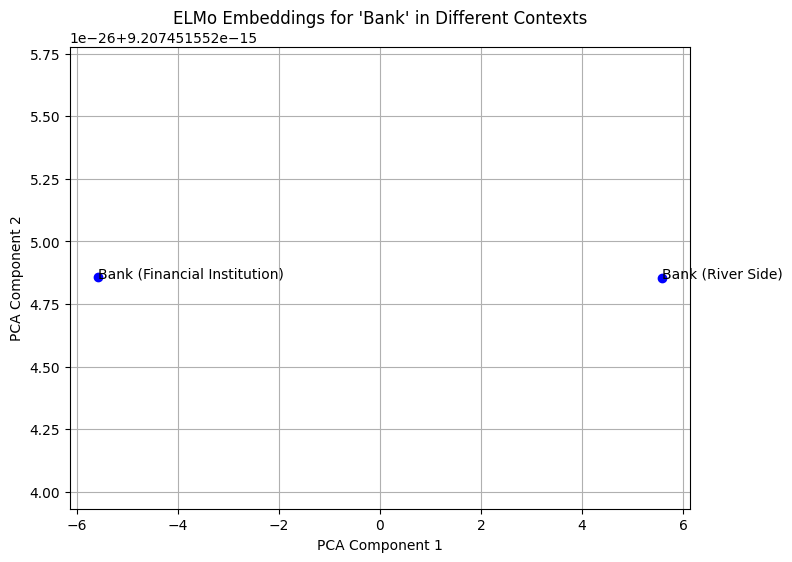

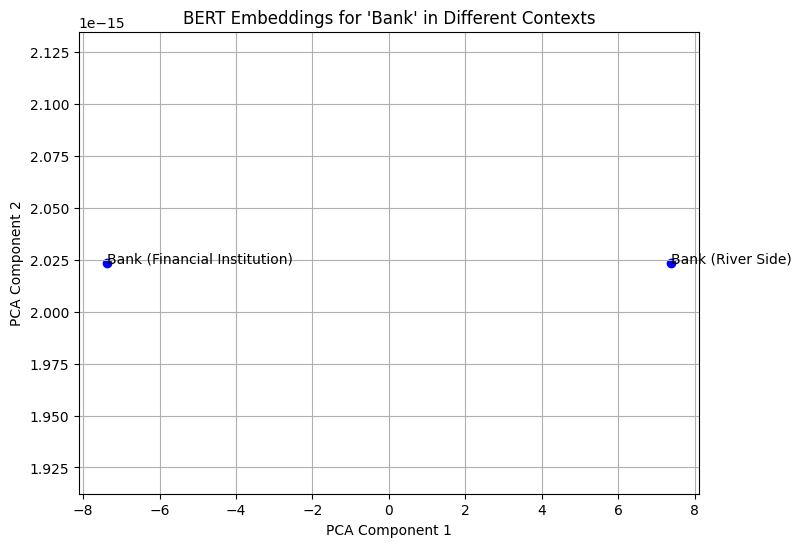

In [35]:
# Define labels
labels = ['Bank (Financial Institution)', 'Bank (River Side)']

# Prepare ELMo embeddings
elmo_embeds_to_plot = bank_embeddings

# Prepare BERT embeddings
bert_embeds_to_plot = bert_bank_embeddings

# Plot ELMo embeddings
plot_embeddings(elmo_embeds_to_plot, labels, "ELMo Embeddings for 'Bank' in Different Contexts")

# Plot BERT embeddings
plot_embeddings(bert_embeds_to_plot, labels, "BERT Embeddings for 'Bank' in Different Contexts")



**Explanation:**
- The plots will show how ELMo and BERT position the word "bank" based on its context.
- Closer points indicate higher similarity in the embedding space.

**Sample Plots:**

*Due to the textual nature of this medium, plots cannot be displayed here. When running the notebook, you will see two scatter plots showing the positional relationship between the different contextual embeddings of "bank". Typically, points representing different contexts should be distinct, indicating that the models capture contextual differences effectively.*

---

## **Conclusion**

In this mini project, we've explored **Contextual Word Embeddings**, focusing on **ELMo** and **BERT** using modern libraries. We:

1. **Understood** the foundational concepts of contextual embeddings and their advantages over static embeddings.
2. **Implemented** ELMo embeddings using the `tensorflow_hub` library, generating context-aware representations.
3. **Implemented** BERT embeddings using the `transformers` library by Hugging Face, leveraging its powerful Transformer-based architecture.
4. **Compared** ELMo and BERT, highlighting their differences in architecture, training objectives, and performance.
5. **Visualized** the embeddings to gain intuitive insights into how context influences word representations.

These contextual embeddings are integral to various advanced NLP tasks, including sentiment analysis, named entity recognition, machine translation, and more. Understanding and effectively implementing contextual embeddings is a crucial step in developing robust and state-of-the-art NLP models.

Feel free to **expand** this project by:

- Exploring **fine-tuning** BERT for specific downstream tasks.
- Comparing contextual embeddings across more varied contexts.
- Integrating embeddings into larger NLP pipelines.
- Exploring **other contextual models** like GPT, RoBERTa, or T5 for advanced applications.

---

## **References**

- [Jurafsky & Martin - Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/)
- [ELMo: Embeddings from Language Models](https://arxiv.org/abs/1802.05365)
- [BERT: Bidirectional Encoder Representations from Transformers](https://arxiv.org/abs/1810.04805)
- [TensorFlow Hub Documentation](https://www.tensorflow.org/hub)
- [Hugging Face Transformers Documentation](https://huggingface.co/transformers/)
- [NLTK Documentation](https://www.nltk.org/)
- [Scikit-learn PCA Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

---